# CLASSIFYING GERMAN TRAFFIC SIGNS MODELLING PART
+ We are going to use the same AlexNet like configuration as for our AlexNet like architecture for CIFAR10 [https://github.com/huygensravel/AlexNet_for_cifar10](https://github.com/huygensravel/AlexNet_for_cifar10)  except that we are removing the local response normalization since here we have only one channel.

# Importing Libraries

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import random
random.seed(1)    # python random seed
np.random.seed(1)  # numpy random seed

import tensorflow.keras.backend as K
import tensorflow as tf

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPool2D,
                                     AveragePooling2D,
                                     Lambda, Flatten,
                                     Dense, Dropout,
                                     BatchNormalization)

from tensorflow.keras import initializers
from tensorflow.keras.optimizers import (SGD, Adam, Nadam,
                                         Adagrad, RMSprop, Adadelta)

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers

from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix

import seaborn

seaborn.set(style='whitegrid')
# TypeError: The added layer must be an instance of class Layer.
#     Found: <class 'tensorflow.python.keras.layers.pooling.AveragePooling2D'>

# Loading Dataset

In [5]:
def load_pickle(file_path):
    '''load data from pickle file
    Parameters:
    -----------
               file_path (str): path to the pickle file.
    '''

    with open(file_path, 'rb') as pickle_file:
        data = pickle.load(pickle_file)
        pickle_file.close()
    return data

train = load_pickle('data/processed/train.p')
valid = load_pickle('data/processed/valid.p')
test_labelled = load_pickle('data/processed/test_labelled.p')

In [6]:
# checking the data

#train
#valid
test_labelled

{'features': array([[[[-0.7578125 ],
          [-0.7838542 ],
          [-0.5338542 ],
          ...,
          [-0.71875   ],
          [-0.7890625 ],
          [-0.7604166 ]],
 
         [[-0.828125  ],
          [-0.8177084 ],
          [-0.8125    ],
          ...,
          [-0.8046875 ],
          [-0.8203125 ],
          [-0.8072917 ]],
 
         [[-0.8098959 ],
          [-0.828125  ],
          [-0.8255208 ],
          ...,
          [-0.8151042 ],
          [-0.8177084 ],
          [-0.8255208 ]],
 
         ...,
 
         [[-0.7890625 ],
          [-0.7864583 ],
          [-0.6822917 ],
          ...,
          [-0.8359375 ],
          [-0.8463542 ],
          [-0.8307292 ]],
 
         [[-0.65625   ],
          [-0.7708333 ],
          [-0.7890625 ],
          ...,
          [-0.84375   ],
          [-0.8359375 ],
          [-0.84375   ]],
 
         [[-0.8072917 ],
          [-0.4895833 ],
          [-0.7109375 ],
          ...,
          [-0.8046875 ],
          [-0.843

In [7]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test_labelled['features'], test_labelled['labels']

In [8]:
print('train:',
      x_train.shape,
      y_train.shape,
      '\n',
      'validation:',
      x_validation.shape,
      y_validation.shape,
      '\n',
      'test:',
      x_test.shape,
      y_test.shape)

train: (31368, 32, 32, 1) (31368,) 
 validation: (7841, 32, 32, 1) (7841,) 
 test: (12569, 32, 32, 1) (12569,)


In [9]:
# converting the target class vector into binary class matrix
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_test = to_categorical(y_test)

In [10]:
# checking the shape of the data
print("\nTrain features shape: ", x_train.shape)
print("Train target shape: ",y_train.shape,"\n")
print("Validation features shape: ", x_validation.shape)
print("Validation target shape: ", y_validation.shape, "\n")
print("Test features shape: ", x_test.shape)
print("Test target shape: ", y_test.shape, "\n")


Train features shape:  (31368, 32, 32, 1)
Train target shape:  (31368, 43) 

Validation features shape:  (7841, 32, 32, 1)
Validation target shape:  (7841, 43) 

Test features shape:  (12569, 32, 32, 1)
Test target shape:  (12569, 43) 



# Creating and Training the model


In [11]:
# function for creating and compiling the model
def create_alexnet(lr, initializer, optimizer):
    """Creating and compiling a cnn model using keras.models.Sequential().
    INPUT:
    ------
          lr (str): value of the learning rate in string. The learning rate
              will be directly used by the optimizer parameter and will not
              be seen in this code. It is passed as a parameters so that the
              variable lr appears in this function local  scope of variable.
            
          initializer (str): string values for tf.keras.initializers classes.
          
          optimizer (str): to be evaluated by the built in eval() function.
                     must be one of tf.keras.optimizers optimizer classes
                     when evaluated, the corresponding class must have been
                     properly imported in the python session.
    
    OUTPUT:
    -------
          model (tensorflow.python.keras.engine.sequential.Sequential):
                 the compiled model
    """

#     # unpacking the local response normalization hyperparameters
#     depth_radius, bias, alpha, beta = lr_norm_param

#     # defining a local response normalization function
#     lr_norm = tf.nn.local_response_normalization
#     local_resp_norm = lambda _ : lr_norm(_, 
#                                          depth_radius=depth_radius,
#                                          bias=bias,
#                                          alpha=alpha,
#                                          beta=beta)
    
    ################# AlexNet Model  ##############################

    # creating an instance of keras Sequential class
    model = Sequential()

    # first block of layers C1, P1, N1
    # ================================

    # convolution layer C1
    model.add(Conv2D(96, (3, 3),
                     strides=(1, 1),
                     activation='relu',
                     input_shape=(32, 32, 1),
                     kernel_initializer='lecun_uniform',
                     kernel_regularizer=regularizers.l2(1e-1),
                     bias_regularizer=regularizers.l2(1e-1),
                     activity_regularizer=regularizers.l2(1e-2)))

    # max pooling layer / downsampling P1
    model.add(MaxPool2D((2,2),
                        strides=(2, 2),
                        padding='same'))

    # second block of layers C2, P2, N2
    # =================================

    # convolution layer C2
    model.add(Conv2D(384, (2, 2), 
                     strides=(1, 1),
                     activation='relu',
                     kernel_initializer='lecun_uniform'))

    # adding batch normalization
    model.add(BatchNormalization())

    # max pooling layer / downsampling P2
    model.add(MaxPool2D((2,2),
                        strides=(2, 2),
                        padding='same')) 

    # third block of layers C3, C4, C5, P5
    # ====================================
    
    # convolution layer C3
    model.add(Conv2D(384, (2, 2), 
                     strides=(1, 1),
                     activation='relu', 
                     kernel_initializer='lecun_uniform'))
    
    # adding batch normalization
    model.add(BatchNormalization())

    # convolution layer C4
    model.add(Conv2D(256, (2, 2), 
                     strides=(1, 1),
                     activation='relu',
                     kernel_initializer='lecun_uniform'))
    
    # adding batch normalization
    model.add(BatchNormalization())

    # convolution layer C5
    model.add(Conv2D(256, (2, 2), 
                     strides=(1, 1),
                     activation='relu',
                     kernel_initializer='lecun_uniform'))
    
    # adding batch normalization
    model.add(BatchNormalization())

    # max pooling layer / downsampling P5
    model.add(MaxPool2D((2,2),
                        strides=(2, 2),
                        padding='same')) 

    # adding dropout
    model.add(Dropout(0.2))

    # last block of layers / neural network: FC6, FC7, FC8
    # ==================================================
    
    # flatten the tensor into 1D array
    model.add(Flatten())

    # batch normalization
    model.add(BatchNormalization()) # comment for 87%

    model.add(Dropout(0.2))

    # input layer FC6
    model.add(Dense(512,
                    activation='relu',
                    kernel_initializer=initializer,
                    kernel_regularizer=regularizers.l2(2e-1),  
                    bias_regularizer=regularizers.l2(2e-1),
                    activity_regularizer=regularizers.l2(1e-2))
                    )

    # batch normalization
    model.add(BatchNormalization())

    # dropping out some neurons
    model.add(Dropout(0.7))

    # hidden layer FC7
    model.add(Dense(640,
                    activation='relu',
                    kernel_initializer=initializer,
                    kernel_regularizer=regularizers.l2(3e-1),
                    bias_regularizer=regularizers.l2(3e-1),
                    activity_regularizer=regularizers.l2(1e-2)) 
                    )

    # output layer FC8
    model.add(Dense(43,
                    activation='softmax',
                    kernel_initializer=initializer))


    ################### End of Model #################################

    # compiling the model
    # ======================
    model.compile(optimizer=eval(optimizer),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [12]:
# defining a learning rate scheduler function
def scheduler(epoch, lr):
    """ Learning rate scheduler
    INPUT:
    ------         
          epochs (int): current number of epoch.

          lr (float): initial learning rate
    
    OUTPUT:
    -------
          history (tensorflow.python.keras.callbacks.History): History for the
                 model training
    """

    if epoch < 20:  # changed from 8 20:33
        return lr
    else:
        return lr * tf.math.exp(0.08*(20-epoch))



In [13]:
# Creating a function which plots loss or accuracy curve
def plot_train_val_curves(history):
    """Function plotting the train and validation loss and accuracy curves
    INPUT:
    -----   
            history (tensorflow.python.keras.callbacks.History):
                     output of the .fit() method of a keras Model instance
    OUTPUT:
    ------
            None (it shows some plots)
    """

    # creating figure and axis for the plot
    fig, axes = plt.subplots(1,2, figsize=(20,8))

    # train and validation loss plot
    axes[0].plot(history.history['loss'])
    axes[0].plot(history.history['val_loss'])
    axes[0].set_title('Model Loss Progress During Training', fontsize=15)
    axes[0].set_ylabel('Training and Validation Loss', fontsize=12)
    axes[0].set_xlabel('Epoch number', fontsize=12)
    axes[0].legend(['Training Loss', 'Validation Loss'], fontsize=12)

    # train and validation accuracy plot
    axes[1].plot(history.history['accuracy'])
    axes[1].plot(history.history['val_accuracy'])
    axes[1].set_title('Model accuracy Progress During Training', fontsize=15)
    axes[1].set_ylabel('Training and Validation accuracy', fontsize=12)
    axes[1].set_xlabel('Epoch number', fontsize=12)
    axes[1].legend(['Training accuracy', 'Validation accuracy'], fontsize=12)

    plt.show()



In [14]:
%%time

# Removes all data from previous models
K.clear_session()

# setting the values for the initial learning rate,
# initializer for the neural network part, the optimizer and the batch size
lr = 0.0001
initializer = 'lecun_normal'
batch_size = 12
optimizer = 'Nadam(learning_rate=lr, beta_1=0.75, beta_2=0.8)'

# creating the model
model = create_alexnet(lr, initializer, optimizer)

# setting random seed to get reproducible results
random.seed(1)    # python random seed
np.random.seed(1)  # numpy random seed
tf.random.set_seed(1) # tensorflow global random seed
tf.compat.v1.set_random_seed(1) # tensorflow graph level random seed

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                             patience=8)

# learning rate scheduler
lambda_scheduler = lambda _ : scheduler( _ , lr)
lr_sched = LearningRateScheduler(lambda_scheduler)

# fitting the model
history = model.fit(x=x_train,
                    y=y_train,
                    validation_data=(x_validation,y_validation),
                    epochs=200,
                    batch_size=batch_size,
                    callbacks=[lr_sched, early_stop],
                    shuffle=True,
                    verbose=2)


Epoch 1/200
2614/2614 - 45s - loss: 86.0055 - accuracy: 0.4034 - val_loss: 7.4481 - val_accuracy: 0.6441
Epoch 2/200
2614/2614 - 24s - loss: 4.4083 - accuracy: 0.7590 - val_loss: 3.0423 - val_accuracy: 0.7717
Epoch 3/200
2614/2614 - 24s - loss: 2.3015 - accuracy: 0.8593 - val_loss: 2.1232 - val_accuracy: 0.8151
Epoch 4/200
2614/2614 - 24s - loss: 1.6956 - accuracy: 0.9043 - val_loss: 1.5980 - val_accuracy: 0.8908
Epoch 5/200
2614/2614 - 24s - loss: 1.3812 - accuracy: 0.9306 - val_loss: 1.3310 - val_accuracy: 0.9088
Epoch 6/200
2614/2614 - 24s - loss: 1.1689 - accuracy: 0.9473 - val_loss: 1.1839 - val_accuracy: 0.9190
Epoch 7/200
2614/2614 - 24s - loss: 1.0311 - accuracy: 0.9529 - val_loss: 1.0543 - val_accuracy: 0.9253
Epoch 8/200
2614/2614 - 24s - loss: 0.9188 - accuracy: 0.9579 - val_loss: 1.0374 - val_accuracy: 0.9054
Epoch 9/200
2614/2614 - 24s - loss: 0.8445 - accuracy: 0.9626 - val_loss: 0.8596 - val_accuracy: 0.9430
Epoch 10/200
2614/2614 - 24s - loss: 0.7766 - accuracy: 0.9659 

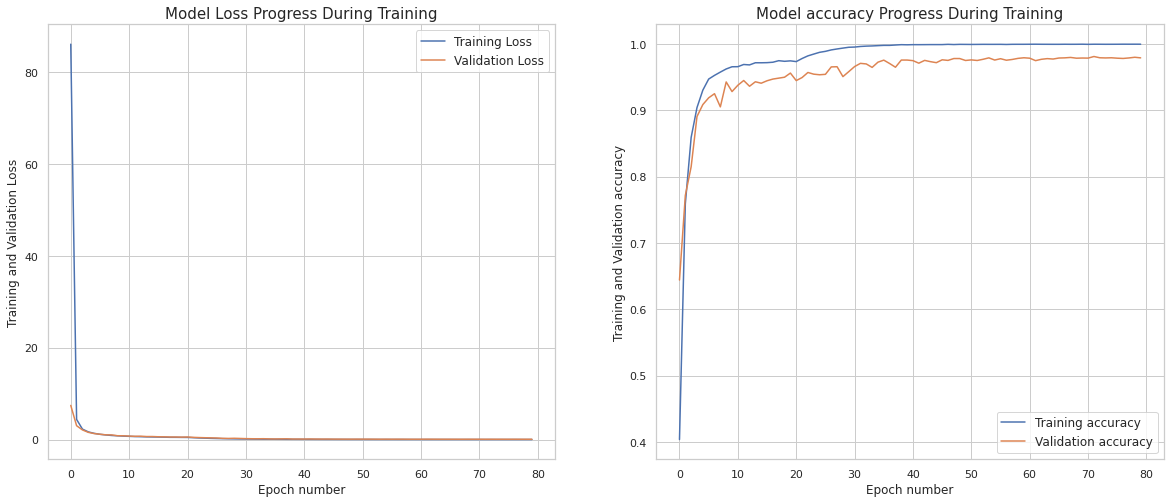

In [15]:
# plotting the validation and training loss and accuracy progress
plot_train_val_curves(history)

# Model Evaluation on Test Data

In [16]:
# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    GREEN = '\033[32m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [17]:
# importing multiple evaluation functions from scikit learn
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# predicting the classes corresponding to the test features
y_pred = model.predict(x_test)

# converting the hot encoded values into single digit class label
pred_labels = np.argmax(y_pred, axis=1) 
y_test_label = np.argmax(y_test, axis=1)
pred_labels, y_test_label

(array([13,  5, 17, ...,  1, 26, 32]), array([13,  5, 17, ...,  1, 26, 32]))

In [22]:
print(bcolors.BOLD + bcolors.OKBLUE +\
      "\nDETAILED TEST SUMMARY:"\
      + bcolors.ENDC + bcolors.ENDC)

# # creating a list of label
# target_names = ["airplane", "automobile", "bird", "cat", "deer",
#                 "dog", "frog", "horse", "ship", "truck"]

# Printing test scores and report
print(bcolors.BOLD + bcolors.GREEN +\
      '\n Test Accuracy: ' + bcolors.ENDC + bcolors.ENDC,
      accuracy_score(y_test_label, pred_labels))

print(bcolors.BOLD + bcolors.GREEN +\
      '\n Classification Report: \n ' + bcolors.ENDC + bcolors.ENDC,
      classification_report(y_test_label,
                            pred_labels))#,
                            #target_names=target_names))


DETAILED TEST SUMMARY:

 Test Accuracy:  1.0

 Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       720
           2       1.00      1.00      1.00       750
           3       1.00      1.00      1.00       450
           4       1.00      1.00      1.00       660
           5       1.00      1.00      1.00       600
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       480
           8       1.00      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       1.00      1.00      1.00       420
          12       1.00      1.00      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       240
          15       1.00      1.00      1.00       210
       

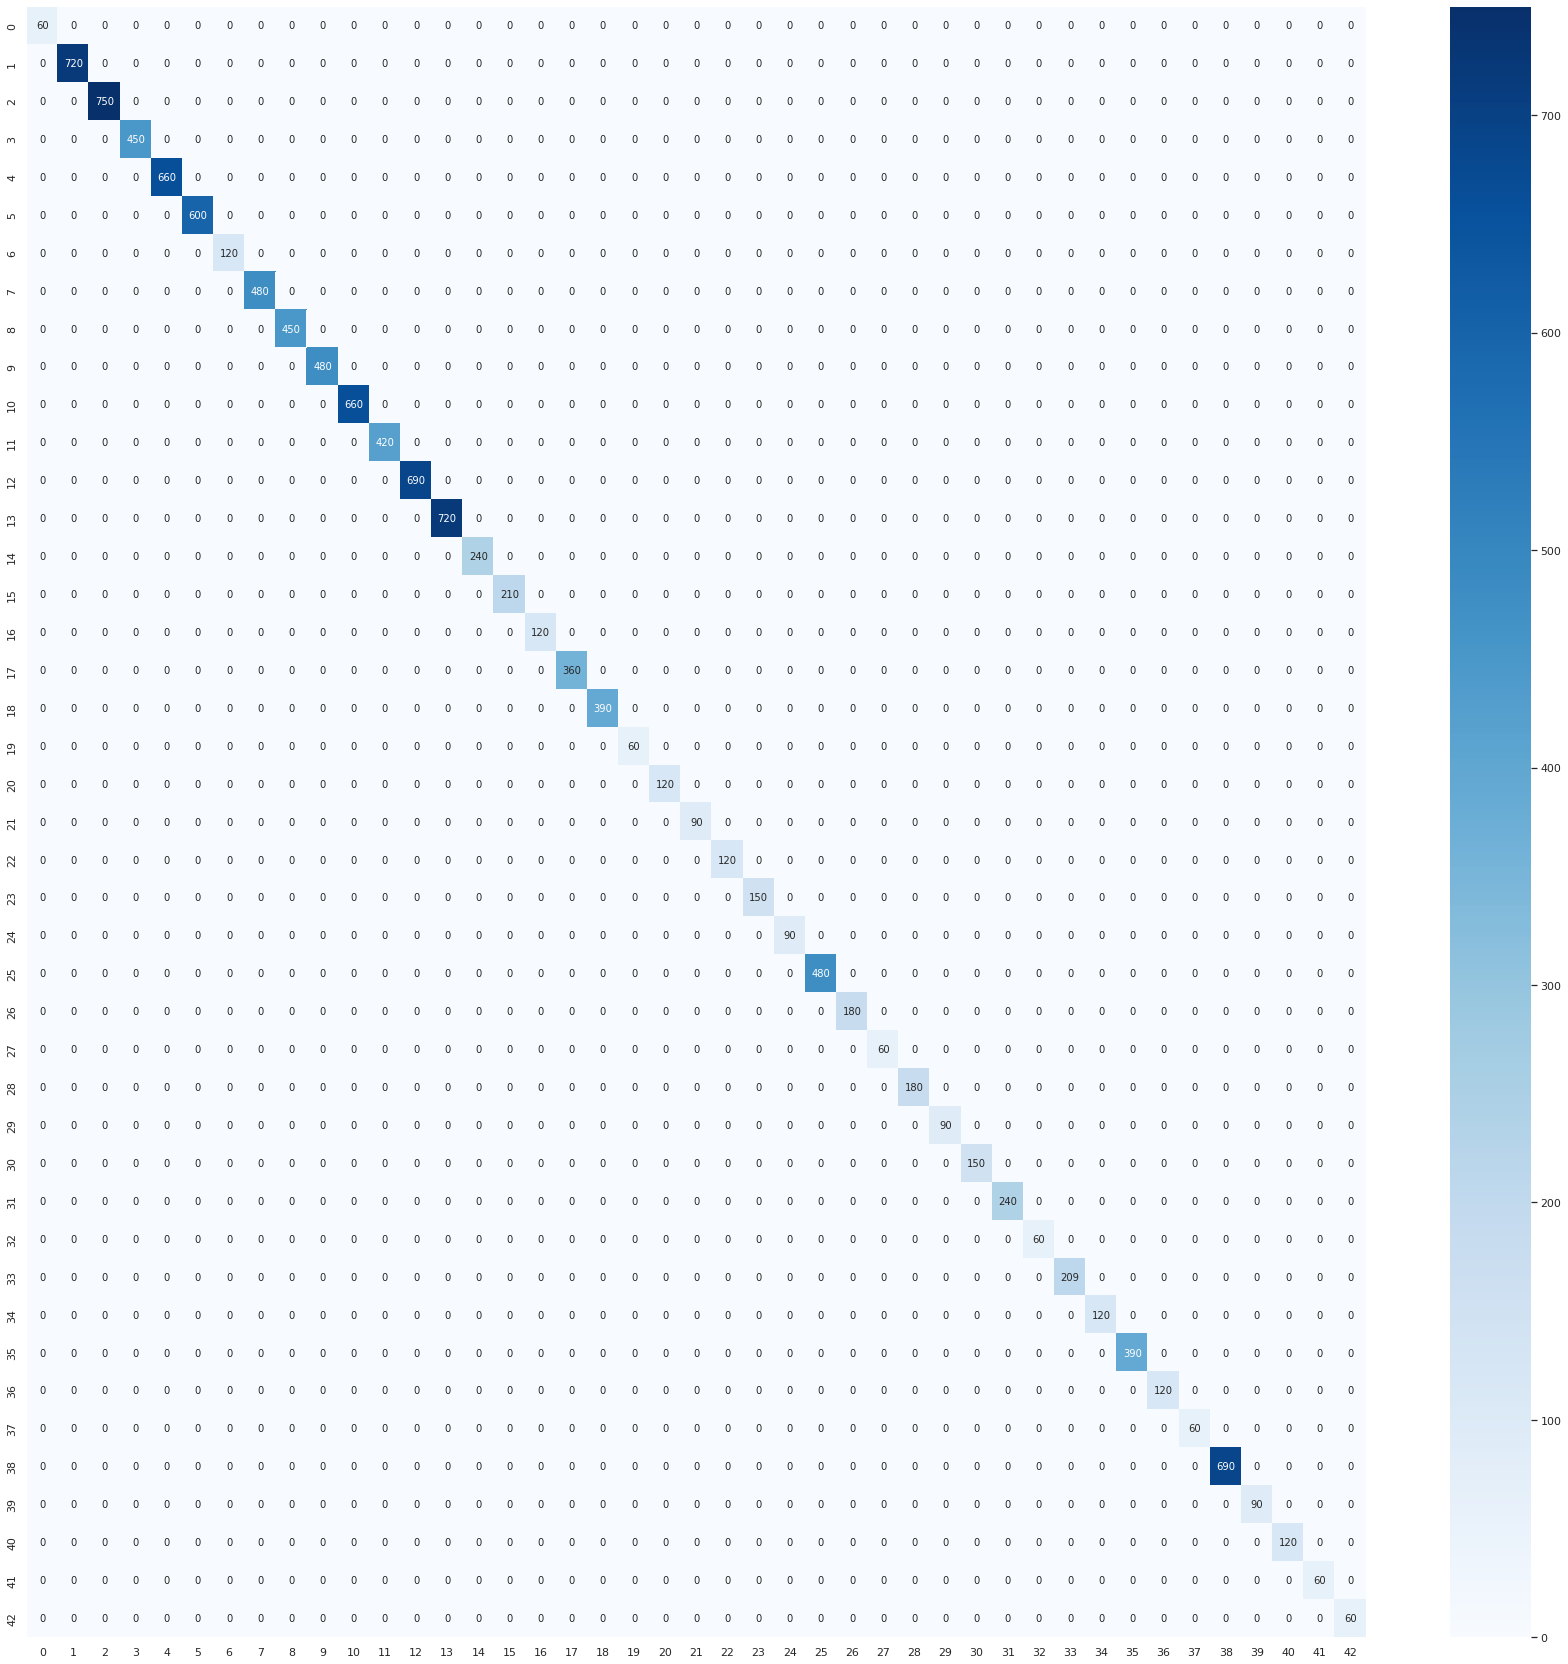

In [33]:
conf_mat = confusion_matrix(pred_labels, y_test_label)
plt.figure(figsize=(30,30))
_ = seaborn.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')


Sample from test data and prediction



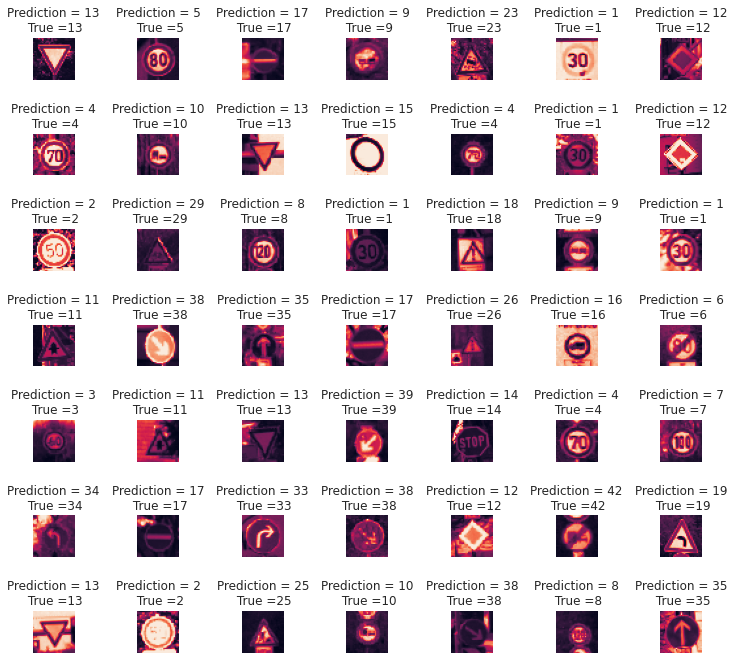

In [30]:
# plotting some test data with prediction
l, w = 7, 7

fig, axes = plt.subplots(l, w, figsize=(12,12))
axes = axes.ravel()

print(bcolors.BOLD +"\nSample from test data and prediction\n" + bcolors.ENDC)

for i in np.arange(0, l*w):
    axes[i].imshow(x_test[i].squeeze())
    axes[i].set_title('Prediction = {}\n True ={}'.format(pred_labels[i],
                                                          y_test_label[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace =1.5)

# Final Comment
**We got 100% accuracy on the test data**